# Data

Read in the three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

With the above datasets, answer the following questions. Show the steps taken to produce your final answer.

In [328]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

import warnings
warnings.filterwarnings("ignore")


### Reading Data

In [3]:
clients = pd.read_csv('clients.csv')
loans = pd.read_csv('loans.csv')
payments = pd.read_csv('payments.csv')

Clients

In [5]:
clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [6]:
clients.shape

(25, 4)

In [7]:
clients.isnull().any()

client_id       False
joined          False
income          False
credit_score    False
dtype: bool

Loans

In [8]:
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [9]:
loans.shape

(443, 8)

In [10]:
loans.isnull().any()

client_id      False
loan_type      False
loan_amount    False
repaid         False
loan_id        False
loan_start     False
loan_end       False
rate           False
dtype: bool

Payments

In [13]:
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


In [14]:
payments.shape

(3456, 4)

In [15]:
payments.isnull().any()

loan_id           False
payment_amount    False
payment_date      False
missed            False
dtype: bool

### Merging data

In [16]:
df = clients.merge(loans, on = 'client_id', how = 'left')
df = df.merge(payments, on = 'loan_id', how = 'left')
df.head()

,client_id,joined,income,credit_score,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,payment_amount,payment_date,missed
0,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2369,2002-05-31,1
1,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2439,2002-06-18,1
2,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2662,2002-06-29,0
3,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2268,2002-07-20,0
4,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2027,2002-07-31,1


In [17]:
df.shape

(3456, 14)

In [18]:
df.isnull().any()

client_id         False
joined            False
income            False
credit_score      False
loan_type         False
loan_amount       False
repaid            False
loan_id           False
loan_start        False
loan_end          False
rate              False
payment_amount    False
payment_date      False
missed            False
dtype: bool

### Explanation

Each client has taken one or more loans and has made payments for them. So, All of these data files are merged together. 

The data looks clean at a first glance as it does not seem to have any null values. Also, the total payments are 3456 and the merged data has same observations which says that the merging of these data was successful. 

# Section 1 Questions

1. Give the 5 client IDs with the highest mean payment amount
2. How many unique loans have been given out to clients who joined prior to 2001?
3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

In [19]:
df.head()

,client_id,joined,income,credit_score,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,payment_amount,payment_date,missed
0,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2369,2002-05-31,1
1,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2439,2002-06-18,1
2,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2662,2002-06-29,0
3,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2268,2002-07-20,0
4,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2027,2002-07-31,1


### 1st Part

- Group the dataframe by client_id and find average of payment_amount
- Sort the data in a descending order based on mean payment amount
- Print top 5 client ids

In [35]:
mean_payments = df.groupby('client_id')['payment_amount'].mean().reset_index(drop = False)\
                .sort_values('payment_amount', ascending = False)
list(mean_payments.client_id.values[0:5])

[49545, 29841, 49624, 32885, 46109]

### 2nd Part

- Filter out the clients who joined in 2001 or after
- Find out the unique loans and count them.

In [38]:
df.joined = pd.to_datetime(df.joined)
prior_clients = df[df.joined < pd.to_datetime('2001-01-01')]

In [40]:
prior_clients.joined.max()

Timestamp('2000-11-26 00:00:00')

In [42]:
prior_clients.loan_id.nunique()

49

### 3rd Part

- Filter the clients with credit score less than 700 
- Group by client ids and keep those clients who missed more than 50 payments
- Find the mean number of missed payments by remaining clients

In [50]:
df_miss = df[df.credit_score < 700]
df_miss = df_miss.groupby('client_id')['missed'].sum().reset_index(drop = False)
df_miss = df_miss[df_miss.missed > 50]
df_miss.missed.mean()

69.25

# Section 2 Questions

Create the following visualizations:
    
1. Create a histogram of the payment amounts. Briefly describe the distribution.
2. Produce a line plot the cumulative sum of the number of clients by year.
3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

### 1st Part

- Use distplot function of seaborn to plot histogram of payment amounts

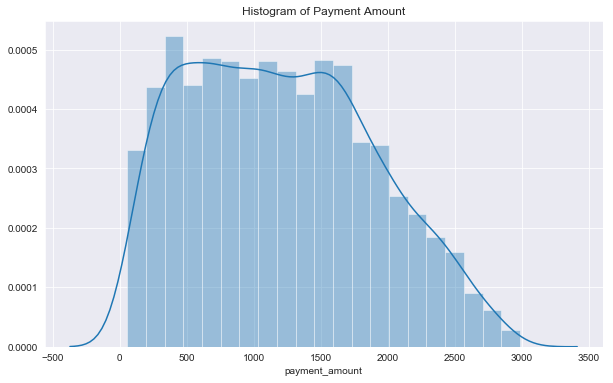

In [85]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.distplot(df.payment_amount)
ax.set_title('Histogram of Payment Amount');

The distribution of the payment_amount is not normal and it looks positively skewed which means that the mean value of payment_amount is greater than the median value. 

### 2nd Part

- Find out year the client joined
- Reduce dataframe to client and the joined year
- Order clients based on year
- Group client by joined year and find total
- Find cumulative sum of clients joined
- Plot the year and cumulative sum of number of clients joined using lineplot function of Seaborn

In [64]:
df['year'] = df.joined.dt.year

In [68]:
cumsum_df = df.groupby('client_id')['year'].mean().reset_index(drop = False).sort_values('year')
cumsum_df = cumsum_df.groupby('year')['client_id'].count().reset_index(drop = False)
cumsum_df['cumulative_sum'] = cumsum_df.client_id.cumsum()
cumsum_df

,year,client_id,cumulative_sum
0,2000,3,3
1,2001,2,5
2,2002,4,9
3,2003,1,10
4,2004,4,14
5,2006,2,16
6,2007,1,17
7,2008,1,18
8,2009,2,20
9,2010,1,21


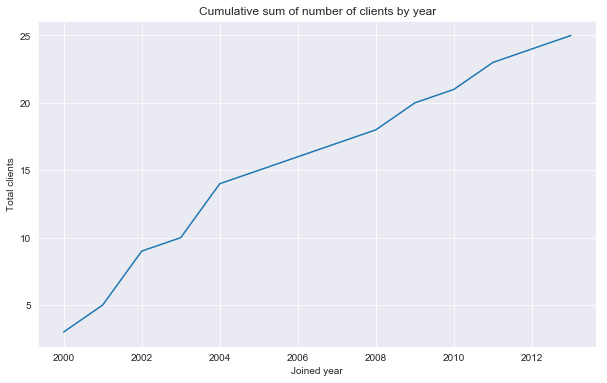

In [83]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = cumsum_df.year, y = cumsum_df.cumulative_sum)
ax.set(xlabel='Joined year', ylabel='Total clients')
ax.set_title('Cumulative sum of number of clients by year');

### 3rd Part

- Find month and year of loan payment date
- Filter payments based on december month
- Group the data by year and find the fraction of missed payments
- Plot year and fraction of missed payments using scatterplot function of seaborn

In [71]:
df.payment_date = pd.to_datetime(df.payment_date)
df['payment_month'] = df.payment_date.dt.month
df['payment_year'] = df.payment_date.dt.year

In [72]:
dec_miss_payments = df[df.payment_month == 12]
dec_miss_payments = dec_miss_payments.groupby('payment_year')['missed'].mean().reset_index(drop = False)
dec_miss_payments = dec_miss_payments.sort_values('payment_year')
dec_miss_payments

,payment_year,missed
0,2000,0.500000
1,2001,0.481481
2,2002,0.300000
3,2003,0.520000
4,2004,0.550000
5,2005,0.466667
6,2006,0.375000
7,2007,0.562500
8,2008,0.333333
9,2009,0.666667


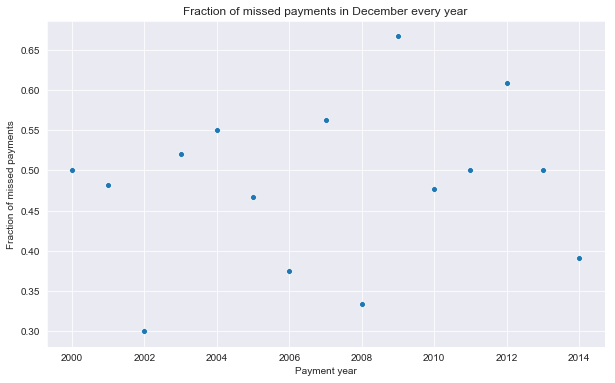

In [82]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = dec_miss_payments.payment_year, y = dec_miss_payments.missed)
ax.set(xlabel='Payment year', ylabel='Fraction of missed payments')
ax.set_title('Fraction of missed payments in December every year');

# Section 3 - Modelling

Create a model that will predict whether a person does or does not have diabetes. Use the diabetes.csv dataset. The target column in the dataset is "Outcome". Assume no features leak information about the target.

Your solution should include the below. You may use whichever python libraries you wish to complete the task:
1. Feature engineering
2. Model fitting and performance evaluation
3. A function that takes as arguments: a model, train data, test data, and returns the model's predictions on the test data
4. A function that takes a set of predictions and true values and that validates the predictions using appropriate metrics
5. Anything else you feel is necessary for modelling or improving the performance of your model


__This exercise is intended for you to show your proficiency in machine learning, understanding of the various techniques that can be employed to improve the performance of a model, and your ability to implement those techniques. Please, therefore, show your working at all times. You will be judged more for the above than for the performance of the final model your produce.__

### Reading the data

In [240]:
diabetes = pd.read_csv('test_diabetes.csv', delimiter=";")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1


In [241]:
diabetes.shape

(768, 9)

In [242]:
diabetes.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [243]:
diabetes.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                      object
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

### Data Cleaning and Feature Engineering

Removing outliers using inter quartile range and based on logic

In [244]:
def limits(data):
    data = data.dropna(axis = 0)
    q1, q3= np.percentile(data,[25,75])
    iqr = q3 - q1 
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound

#### Outcome

In [245]:
diabetes.Outcome.value_counts()

0    339
1    177
N    161
Y     91
Name: Outcome, dtype: int64

In [246]:
diabetes.Outcome = diabetes.Outcome.map({'N':0, 'Y':1,'0': 0, "1": 1,})
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

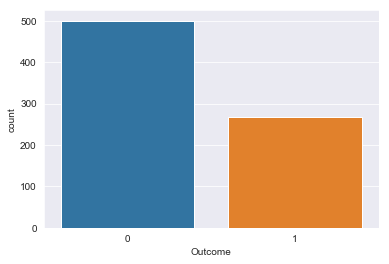

In [263]:
sns.countplot(diabetes.Outcome)

#### Pregnancies

In [247]:
diabetes.Pregnancies.value_counts()

1.0     128
0.0     107
2.0      98
3.0      73
4.0      65
5.0      55
6.0      46
7.0      43
8.0      35
9.0      26
10.0     23
13.0     10
12.0      9
11.0      9
14.0      2
15.0      1
17.0      1
Name: Pregnancies, dtype: int64

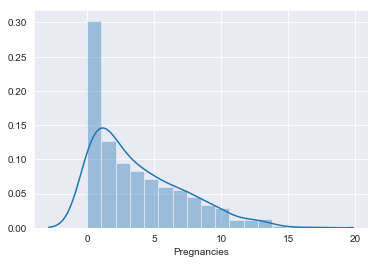

In [248]:
sns.distplot(diabetes.Pregnancies[diabetes.Pregnancies.isnull() == False])

In [249]:
diabetes.Pregnancies.describe()

count    731.000000
mean       3.824897
std        3.369400
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [250]:
limits(diabetes.Pregnancies)

(-6.5, 13.5)

#### Glucose

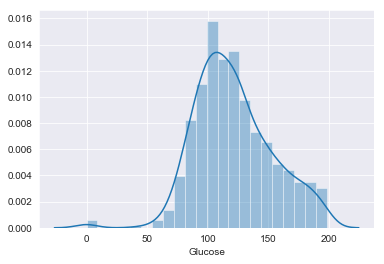

In [251]:
sns.distplot(diabetes.Glucose[diabetes.Glucose.isnull() == False])

In [252]:
diabetes.Glucose.describe()

count    730.000000
mean     121.152055
std       31.774802
min        0.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      198.000000
Name: Glucose, dtype: float64

body's Glucose cannot be zero

In [253]:
limits(diabetes.Glucose)

(36.0, 204.0)

#### BloodPressure

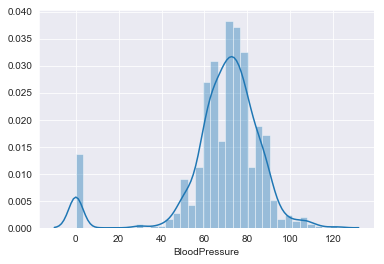

In [254]:
sns.distplot(diabetes.BloodPressure[diabetes.BloodPressure.isnull() == False])

In [255]:
sum(diabetes.BloodPressure == 0)

35

In [256]:
diabetes.BloodPressure.describe()

count    734.000000
mean      69.008174
std       19.496036
min        0.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

The blood pressure cannot be zero.

In [257]:
limits(diabetes.BloodPressure)

(40.0, 104.0)

#### SkinThickness

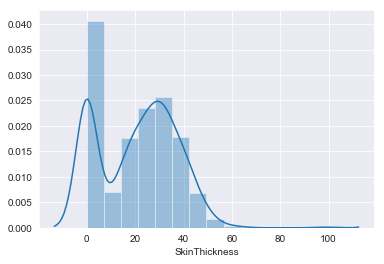

In [258]:
sns.distplot(diabetes.SkinThickness[diabetes.SkinThickness.isnull() == False])

In [259]:
diabetes.SkinThickness.describe()

count    734.000000
mean      20.848774
std       15.876665
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [260]:
sum(diabetes.SkinThickness == 0)

209

In [261]:
diabetes.SkinThickness.value_counts().head()

0.0     209
32.0     30
30.0     25
27.0     23
23.0     21
Name: SkinThickness, dtype: int64

Body's skin thickness cannot be zero and there are lots of observations having skin thickness as 0.

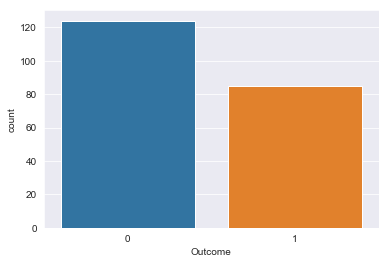

In [262]:
sns.countplot(diabetes.Outcome[diabetes.SkinThickness == 0])

In [271]:
limits(diabetes.SkinThickness)

(-48.0, 80.0)

In [272]:
diabetes.loc[diabetes.SkinThickness == 0, 'SkinThickness'] = np.nan

In [273]:
limits(diabetes.SkinThickness)

(1.0, 57.0)

#### Insulin

In [274]:
diabetes.Insulin.value_counts().head()

Zero    346
105      11
140       8
130       8
94        7
Name: Insulin, dtype: int64

In [275]:
diabetes.Insulin = diabetes.Insulin.apply(lambda x: 0 if x == 'Zero' else x)

In [276]:
diabetes.Insulin = diabetes.Insulin.astype(float)

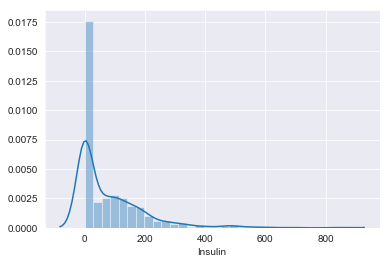

In [277]:
sns.distplot(diabetes.Insulin[diabetes.Insulin.isnull() == False])

In [278]:
diabetes.Insulin.describe()

count    717.000000
mean      79.994421
std      113.612888
min        0.000000
25%        0.000000
50%       36.000000
75%      130.000000
max      846.000000
Name: Insulin, dtype: float64

In [279]:
limits(diabetes.Insulin)

(-195.0, 325.0)

#### BMI

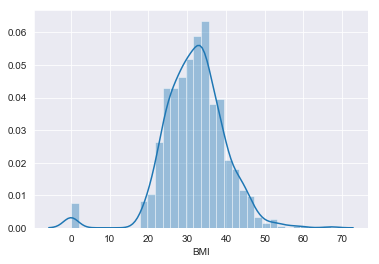

In [280]:
sns.distplot(diabetes.BMI[diabetes.BMI.isnull() == False])

In [281]:
diabetes.BMI.describe()

count    733.000000
mean      31.979536
std        7.918709
min        0.000000
25%       27.400000
50%       32.000000
75%       36.500000
max       67.100000
Name: BMI, dtype: float64

In [282]:
sum(diabetes.BMI == 0)

11

BMI cannont be 0 as well

In [283]:
limits(diabetes.BMI)

(13.749999999999996, 50.150000000000006)

#### DiabetesPedigreeFunction

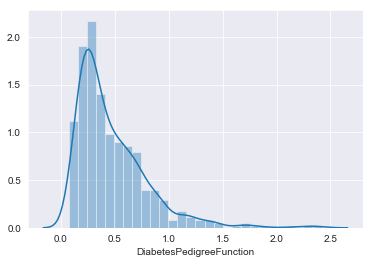

In [284]:
sns.distplot(diabetes.DiabetesPedigreeFunction[diabetes.DiabetesPedigreeFunction.isnull() == False])

In [285]:
diabetes.DiabetesPedigreeFunction.describe()

count    728.000000
mean       0.472702
std        0.331714
min        0.078000
25%        0.245000
50%        0.372500
75%        0.624500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [286]:
limits(diabetes.DiabetesPedigreeFunction)

(-0.3242499999999999, 1.1937499999999999)

#### Age

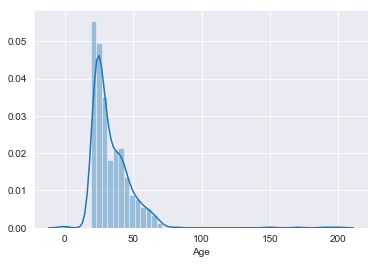

In [287]:
sns.distplot(diabetes.Age[diabetes.Age.isnull() == False])

In [288]:
diabetes.Age.describe()

count    717.000000
mean      34.108787
std       16.119730
min       -1.000000
25%       24.000000
50%       29.000000
75%       41.000000
max      200.000000
Name: Age, dtype: float64

In [289]:
sum(diabetes.Age <= 0)

2

Age cannot be less than 0

In [290]:
limits(diabetes.Age)

(-1.5, 66.5)

In [291]:
diabetes.loc[diabetes.Age < 0, 'Age'] = np.nan

In [292]:
limits(diabetes.Age)

(-1.5, 66.5)

#### Filling all null values with medians

In [293]:
diabetes.fillna(diabetes.median(), inplace = True)
diabetes.isnull().any().any()

False

#### Find outliers based on IQR and replace them median values 

In [294]:
cols = diabetes.columns.drop('Outcome')
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [295]:
for col in cols:
    l, u = limits(diabetes[col])
    diabetes.loc[(diabetes[col] < l) | (diabetes[col] > u), col] = diabetes[col].median()

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0
2,8.0,183.0,64.0,29.0,0.0,23.3,0.6720,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,0
4,0.0,117.0,40.0,35.0,168.0,43.1,0.3725,29.0,1


In [296]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.722656,121.450521,72.130208,28.755208,59.290365,32.140885,0.416345,32.309896,0.348958
std,3.189358,29.601484,10.578506,5.666984,74.462124,6.163407,0.223922,10.318162,0.476951
min,0.000000,44.000000,40.000000,15.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,27.000000,0.000000,27.775000,0.251000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,36.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,78.000000,30.000000,105.000000,35.900000,0.551000,38.250000,1.000000
max,13.000000,197.000000,104.000000,42.000000,300.000000,49.300000,1.127000,64.000000,1.000000


#### Plotting all features

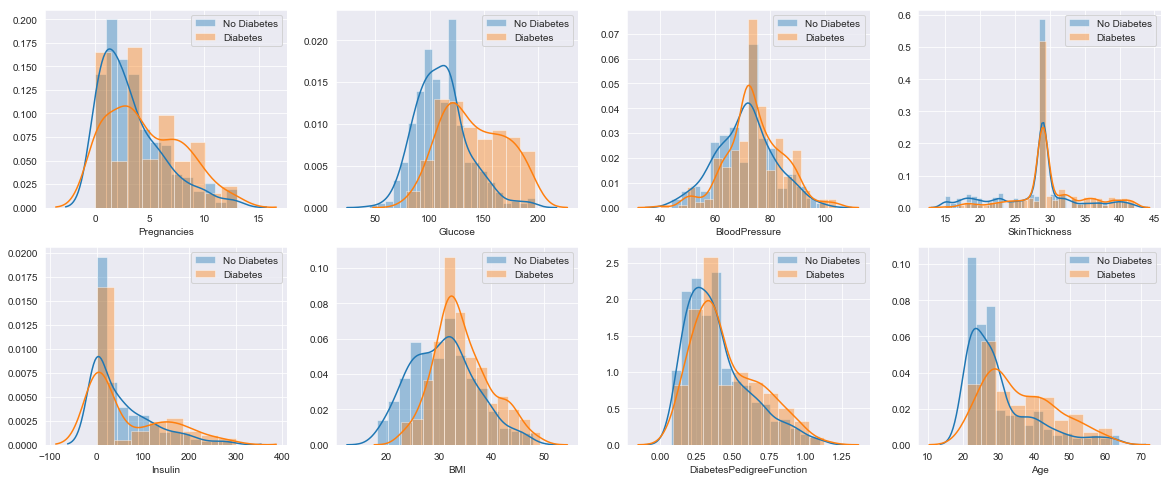

In [304]:
fig, axes = plt.subplots(figsize = (20, 8), nrows = 2, ncols = 4)
axes = axes.ravel()

for i, col in enumerate(cols):
    sns.distplot(diabetes.loc[diabetes.Outcome == 0, col], ax = axes[i], label = 'No Diabetes')
    sns.distplot(diabetes.loc[diabetes.Outcome == 1, col], ax = axes[i], label = 'Diabetes')
    axes[i].legend()

### Model Building

In [306]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, auc, f1_score 
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


#### Train test split

In [311]:
X = diabetes[cols]
y = diabetes.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11, test_size = 0.3)

In [312]:
X_train.shape

(537, 8)

In [313]:
X_test.shape

(231, 8)

In [346]:
y_train.value_counts()

0    350
1    187
Name: Outcome, dtype: int64

In [347]:
350/187

1.8716577540106951

#### Evaluating models

I am considering F1 score as an evaluation metric for this problem.

#### (1) Building models on the data without considering class imbalance

In [334]:
models1 = []
models1.append(('GNB', GaussianNB()))
models1.append(('LR', LogisticRegression()))
models1.append(('DT', DecisionTreeClassifier()))
models1.append(('KNN', KNeighborsClassifier()))
models1.append(('SVC', SVC()))
models1.append(('RF', RandomForestClassifier()))
models1.append(('GB', GradientBoostingClassifier()))
models1.append(('XGB', xgb.XGBClassifier()))

In [339]:
scores = []
names = []

for name, model in models1:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    names.append(name)
    scores.append(score.mean())

df_scores1 = pd.DataFrame({'Model':names, 'F1 Score':scores})
df_scores1 = df_scores1.sort_values('F1 Score', ascending = False).reset_index(drop = True)

In [345]:
df_scores1

,Model,F1 Score
0,GNB,0.588136
1,LR,0.577209
2,XGB,0.576127
3,RF,0.567245
4,KNN,0.561768
5,GB,0.557481
6,DT,0.537328
7,SVC,0.530405


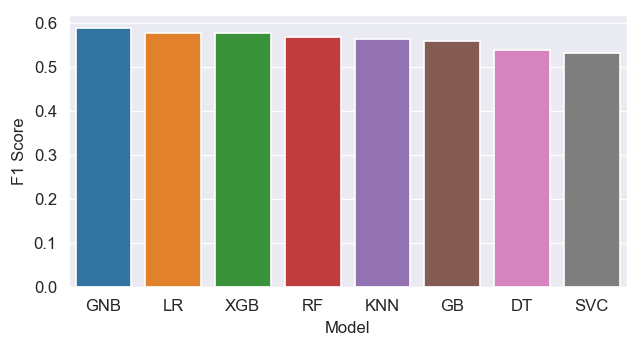

In [344]:
fig, ax = plt.subplots(figsize = (6,3))
sns.barplot(data= df_scores1, x = 'Model', y = 'F1 Score')

#### (2) Building models on the data addressing class imbalance with cost sensitive learning

In [350]:
models2 = []
models2.append(('LR', LogisticRegression(class_weight = 'balanced')))
models2.append(('DT', DecisionTreeClassifier(class_weight = 'balanced')))
models2.append(('SVC', SVC(class_weight = 'balanced')))
models2.append(('RF', RandomForestClassifier(class_weight = 'balanced')))
models2.append(('XGB', xgb.XGBClassifier(scale_pos_weight = 1.87)))

In [351]:
scores2 = []
names2 = []

for name, model in models2:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    
    names2.append(name)
    scores2.append(score.mean())

df_scores2 = pd.DataFrame({'Model':names2, 'F1 Score':scores2})
df_scores2 = df_scores2.sort_values('F1 Score', ascending = False).reset_index(drop = True)

In [353]:
df_scores2

,Model,F1 Score
0,LR,0.629221
1,SVC,0.627827
2,XGB,0.621629
3,RF,0.586734
4,DT,0.512287


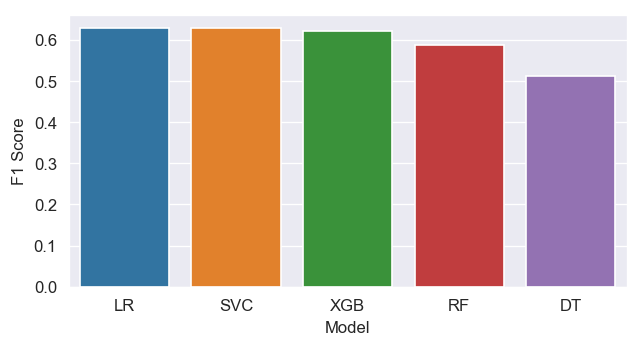

In [352]:
fig, ax = plt.subplots(figsize = (6,3))
sns.barplot(data= df_scores2, x = 'Model', y = 'F1 Score')

#### (3) Building models on the data addressing class imbalance with oversampling minority class using SMOTE

In [354]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

y_train_res.value_counts()

1    350
0    350
Name: Outcome, dtype: int64

In [355]:
scores3 = []
names3 = []

for name, model in models1:
    score = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1')
    
    names3.append(name)
    scores3.append(score.mean())

df_scores3 = pd.DataFrame({'Model':names3, 'F1 Score':scores3})
df_scores3 = df_scores3.sort_values('F1 Score', ascending = False).reset_index(drop = True)

In [356]:
df_scores3

,Model,F1 Score
0,RF,0.806271
1,XGB,0.776486
2,GB,0.767953
3,KNN,0.759446
4,DT,0.740764
5,SVC,0.735511
6,LR,0.717337
7,GNB,0.692823


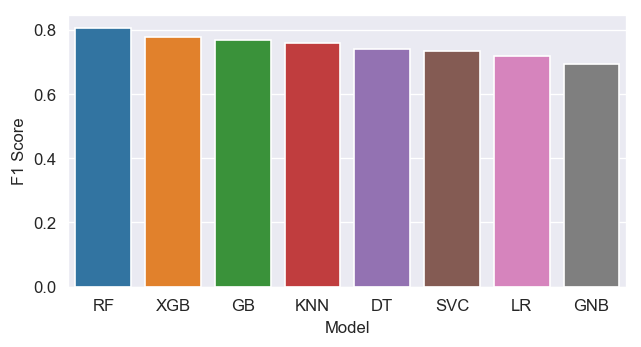

In [357]:
fig, ax = plt.subplots(figsize = (6,3))
sns.barplot(data= df_scores3, x = 'Model', y = 'F1 Score')

### Final Model Building

Since the Random Forest model performs the best with SMOTE oversampling, I will use it and tune its hyperparameters for better performance.

#### Grid 1: Selecting class weight and estimators¶


In [359]:
param_grid1 = {'max_features':['auto', 'sqrt', 'log2', None],
          'n_estimators':[50, 100, 300, 500, 700]
         }

rf_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=rf_model, param_grid=param_grid1, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid1.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [360]:
grid1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [363]:
grid1.best_score_

0.8159152313407633

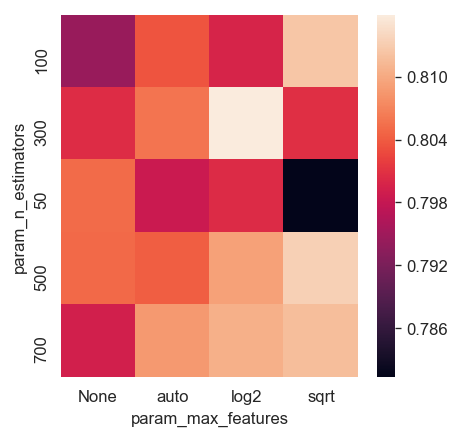

In [362]:
fig, ax = plt.subplots(figsize = (4,4))
dt = pd.DataFrame(grid1.cv_results_)
dt.param_max_features = dt.param_max_features.astype(str)
dt.param_n_estimators = dt.param_n_estimators.astype(str)

table = pd.pivot_table(dt, values='mean_test_score', index='param_n_estimators', 
                       columns='param_max_features')
     
sns.heatmap(table)

#### Grid 2: Selecting max depth and split criterion

In [365]:
param_grid2 = {'max_features':['log2'],
          'n_estimators':[300],
           'criterion': ['entropy', 'gini'],    
          'max_depth': [3, 5, 7, 9, 11, 13, 15, None],
         }

rf_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=rf_model, param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid2.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [366]:
grid2.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [371]:
grid2.best_score_

0.8177830701414189

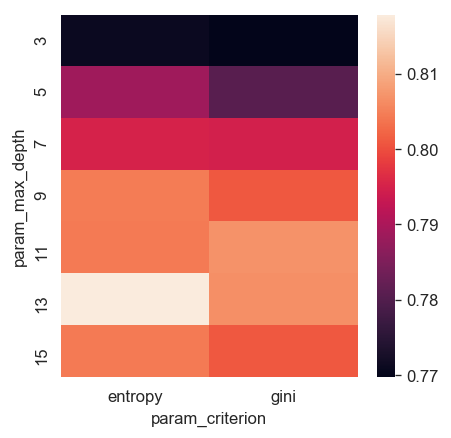

In [367]:
fig, ax = plt.subplots(figsize = (4,4))
dt = pd.DataFrame(grid2.cv_results_)
table = pd.pivot_table(dt, values='mean_test_score', index='param_max_depth', 
                       columns='param_criterion')
sns.heatmap(table)

#### Grid 3: Selecting minimum samples leaf and split

In [368]:
param_grid3 = {'max_features':['log2'],
          'n_estimators':[300],
           'criterion': ['entropy'],    
          'max_depth': [13],
          'min_samples_leaf': [1, 3, 5, 7],
          'min_samples_split': [2, 4, 6, 8]
         }

rf_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=rf_model, param_grid=param_grid3, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid3.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [369]:
grid3.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [370]:
grid3.best_score_

0.8128304499150913

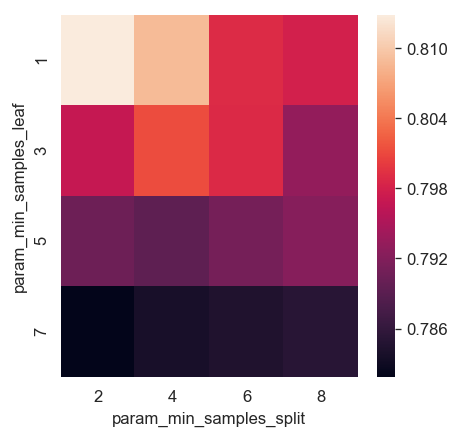

In [372]:
fig, ax = plt.subplots(figsize = (4,4))
dt = pd.DataFrame(grid3.cv_results_)
table = pd.pivot_table(dt, values='mean_test_score', index='param_min_samples_leaf', 
                       columns='param_min_samples_split')
sns.heatmap(table)

#### Grid4: Final grid

In [377]:
param_grid4 = {'max_features':['log2'],
          'n_estimators':[200, 300, 400],
           'criterion': ['entropy'],    
          'max_depth': [12, 13, 14],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 3, 4]
         }

rf_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=rf_model, param_grid=param_grid4, n_jobs=-1, cv=3, verbose=1, scoring = 'f1')
grid4.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   25.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [378]:
grid4.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [379]:
grid4.best_score_

0.8155158065784676

In [381]:
Final_model = grid4.best_estimator_

### Prediction Function

In [386]:
def diabetes_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf):
    
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]
    
    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)
        
    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry['abs_val'] = np.abs(coef_sumry.coefficients)
    coef_sumry = coef_sumry.sort_values(by = "abs_val",ascending = False)
    
    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    b, t = plt.ylim()
    plt.ylim(b + 0.5, t - 0.5)
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    #f1-score
    f1 = f1_score(testing_y, predictions)
    print("F1 Score: ", f1)
    
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    threshold = np.round(thresholds[ix],3)
    
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.subplot(212)
    sns.barplot(y = coef_sumry.features[0:20] ,x = coef_sumry.coefficients[0:20])
    plt.title('Feature Importances')
        
    plt.show()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=13, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.68      0.69      0.69        81

    accuracy                           0.78       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231

Accuracy   Score :  0.7792207792207793
F1 Score:  0.6871165644171778
Area under curve :  0.845185

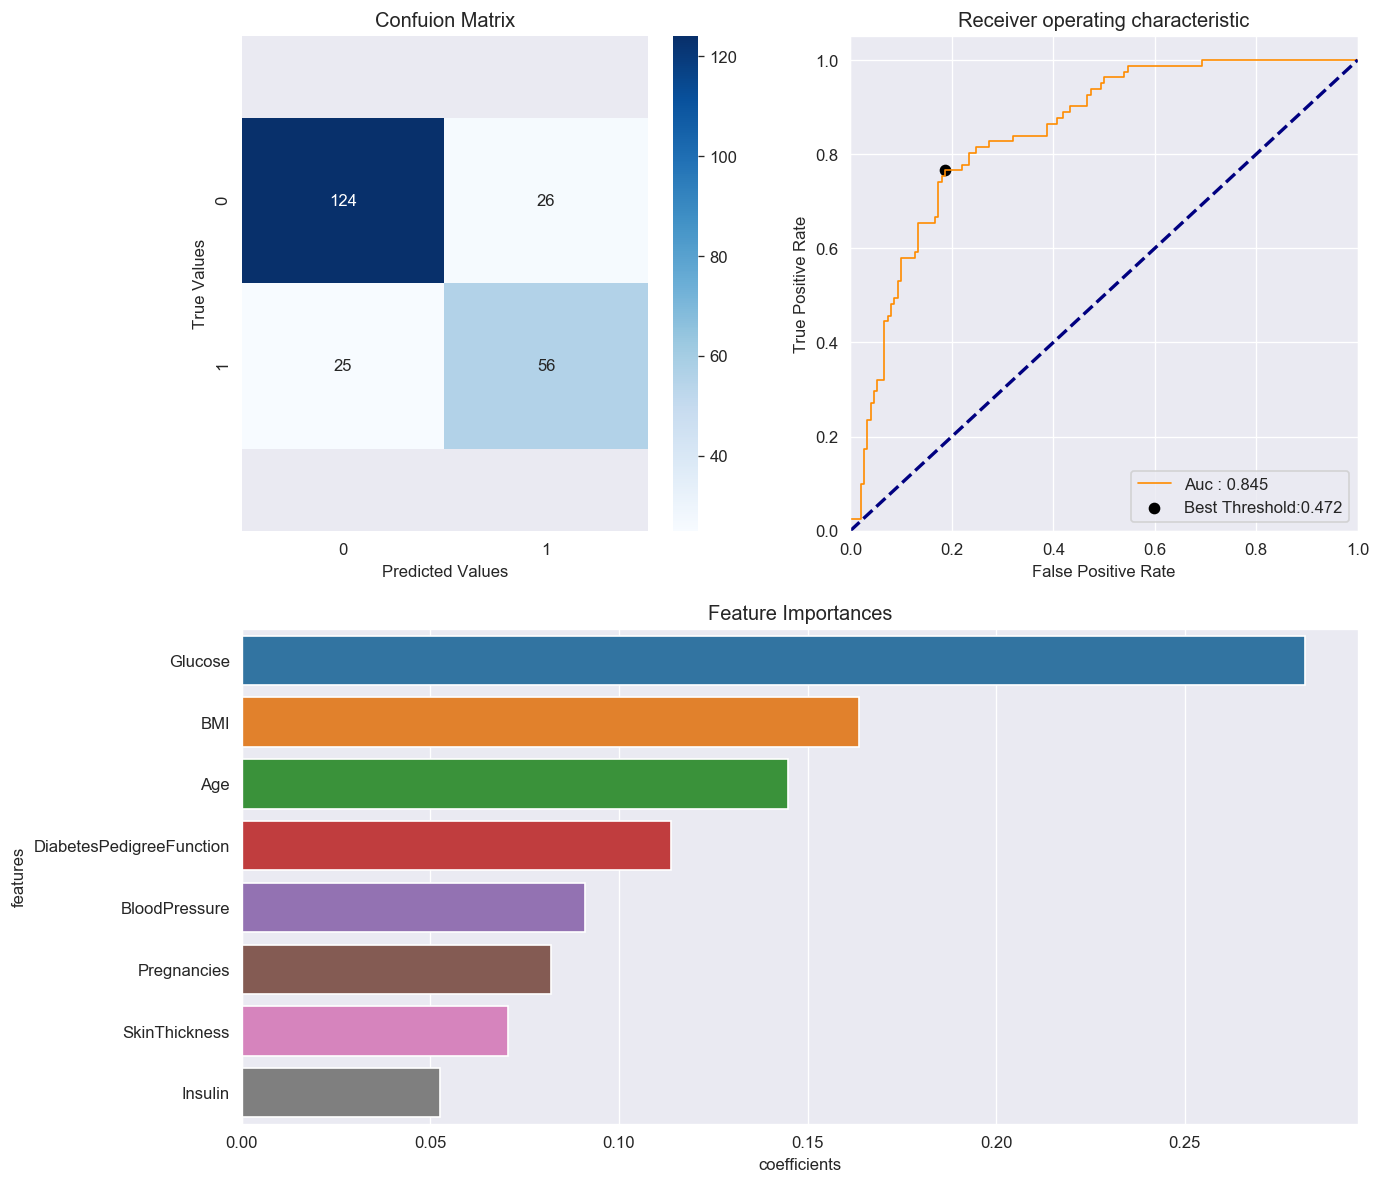

In [399]:
diabetes_prediction(Final_model, X_train_res, y_train_res, X_test, y_test, X_train_res.columns, "features")

In [388]:
#Training prediction

algo = Final_model
algo.fit(X_train_res, y_train_res)
preds = algo.predict(X_train_res)

print(classification_report(y_train_res, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       350
           1       1.00      0.99      0.99       350

    accuracy                           0.99       700
   macro avg       0.99      0.99      0.99       700
weighted avg       0.99      0.99      0.99       700



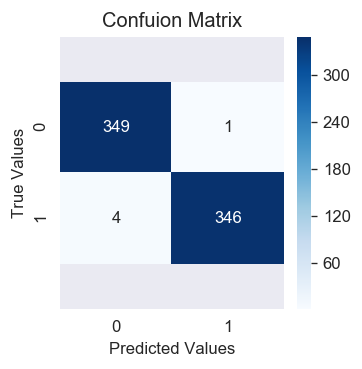

In [390]:
conf_matrix = confusion_matrix(y_train_res,preds)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b + 0.5, t - 0.5)
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values');

We can see here that the model is actually overfitted. We need to tune it again to generalize better. I am not able to complete it because of the time constarint of this challenge. 

#### Saving final model

In [404]:
import pickle
pickle.dump(Final_model, open('model.pkl','wb'))

### Partial Dependance plots

They show how the probability of having diabetes changes with the change in a particular feature according to our model. We can do sanity check based on the domain knowledge. For example, if our model is predicting diabetes for low glucose patients, we would know that the model is wrong. 

In [391]:
from pdpbox import pdp, info_plots

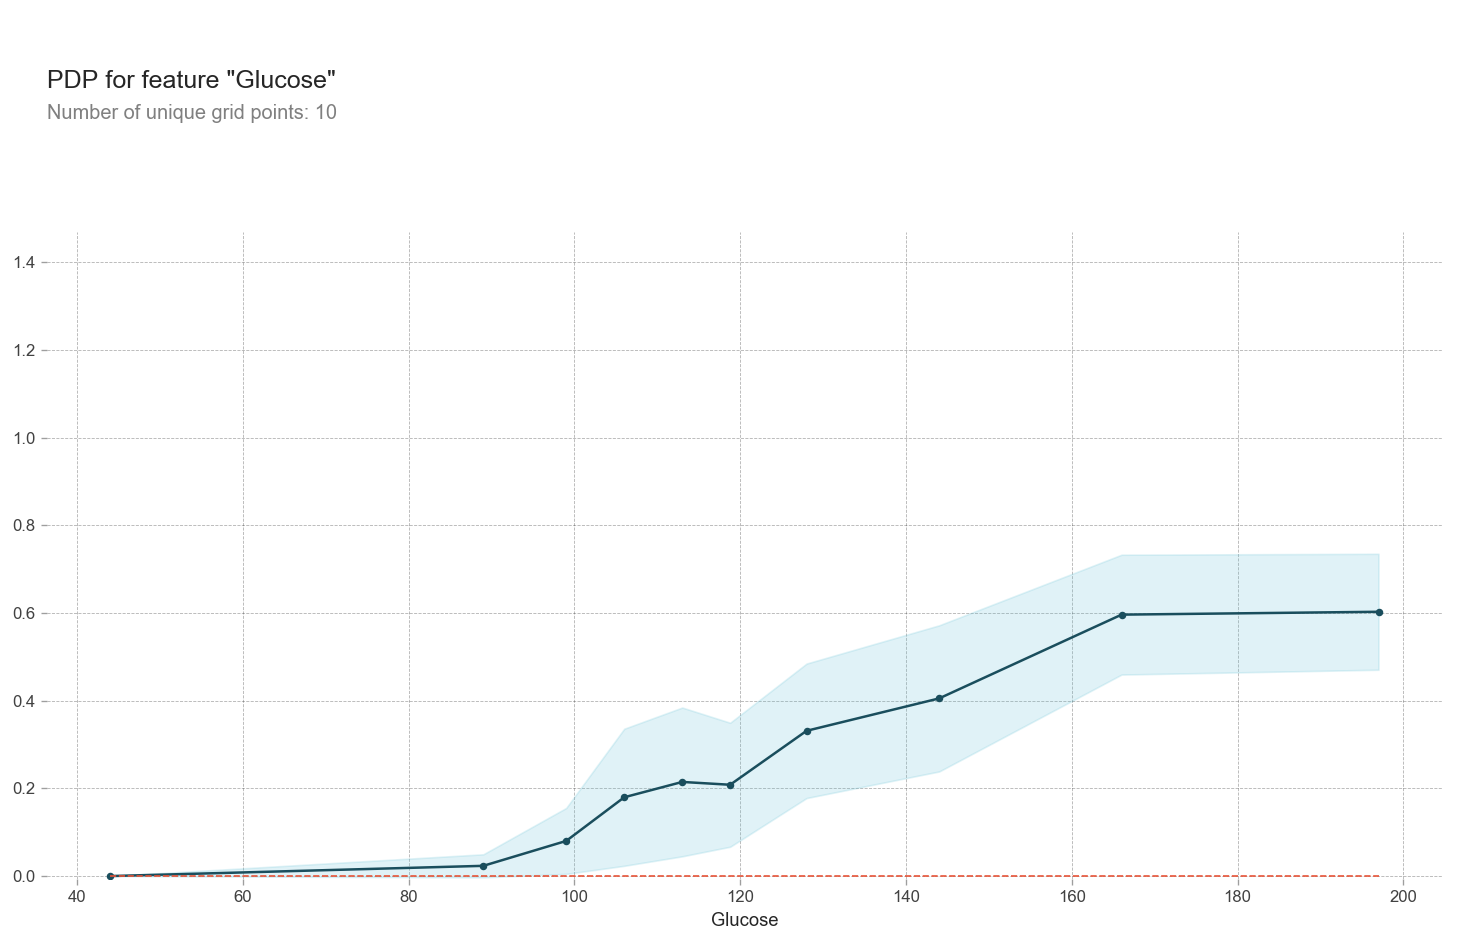

In [392]:
pdp_p = pdp.pdp_isolate(model=Final_model, dataset=X_test, model_features=X_test.columns.values, 
                        feature='Glucose')
pdp.pdp_plot(pdp_p, 'Glucose')
plt.show()

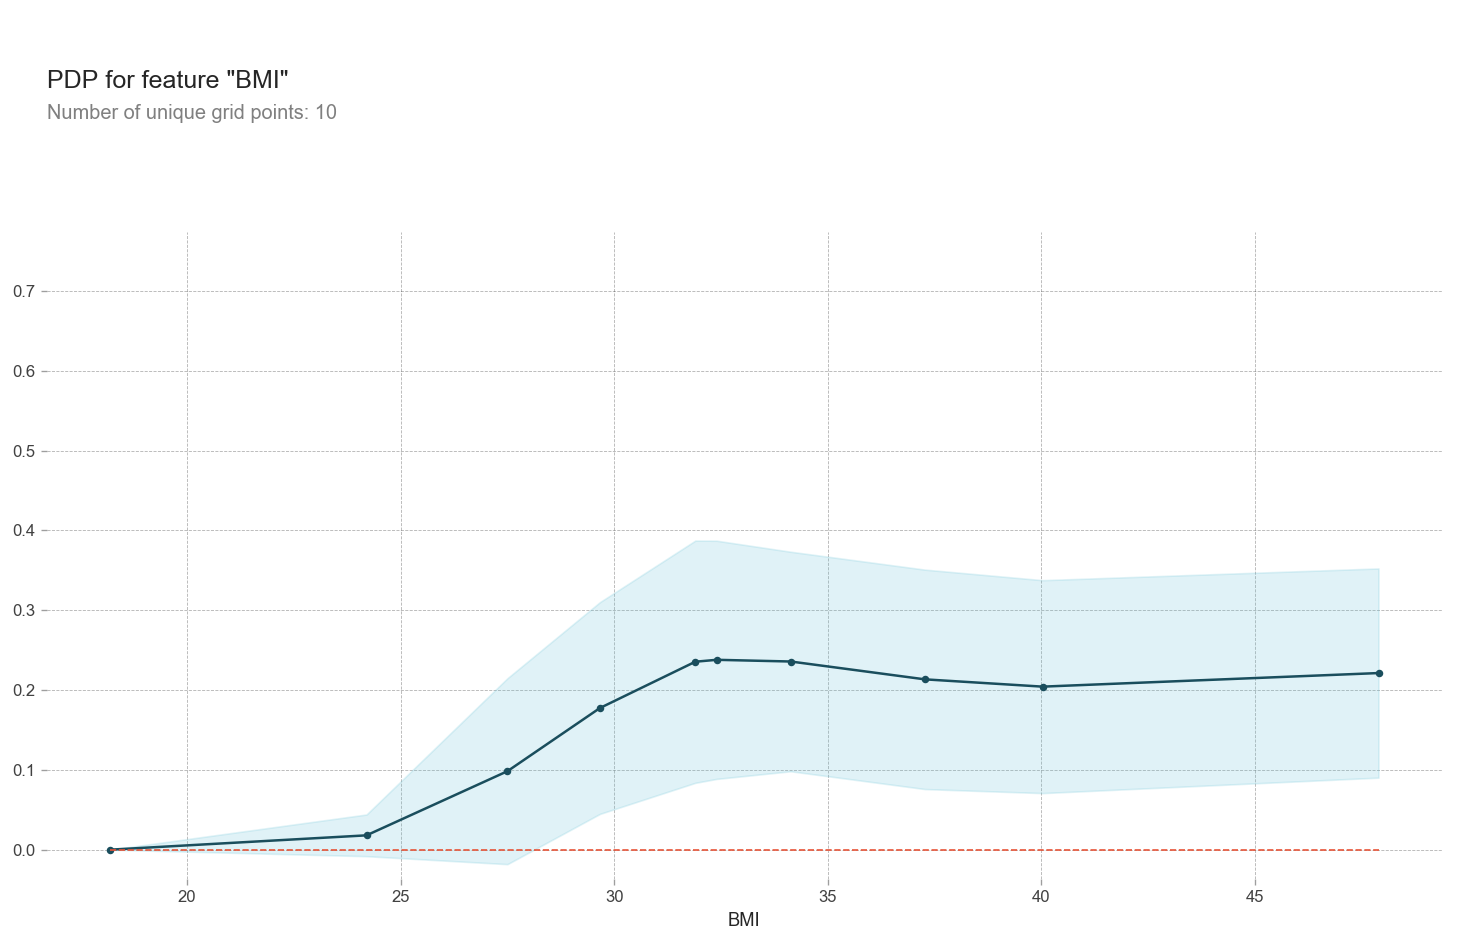

In [393]:
pdp_p = pdp.pdp_isolate(model=Final_model, dataset=X_test, model_features=X_test.columns.values, 
                        feature='BMI')
pdp.pdp_plot(pdp_p, 'BMI')
plt.show()

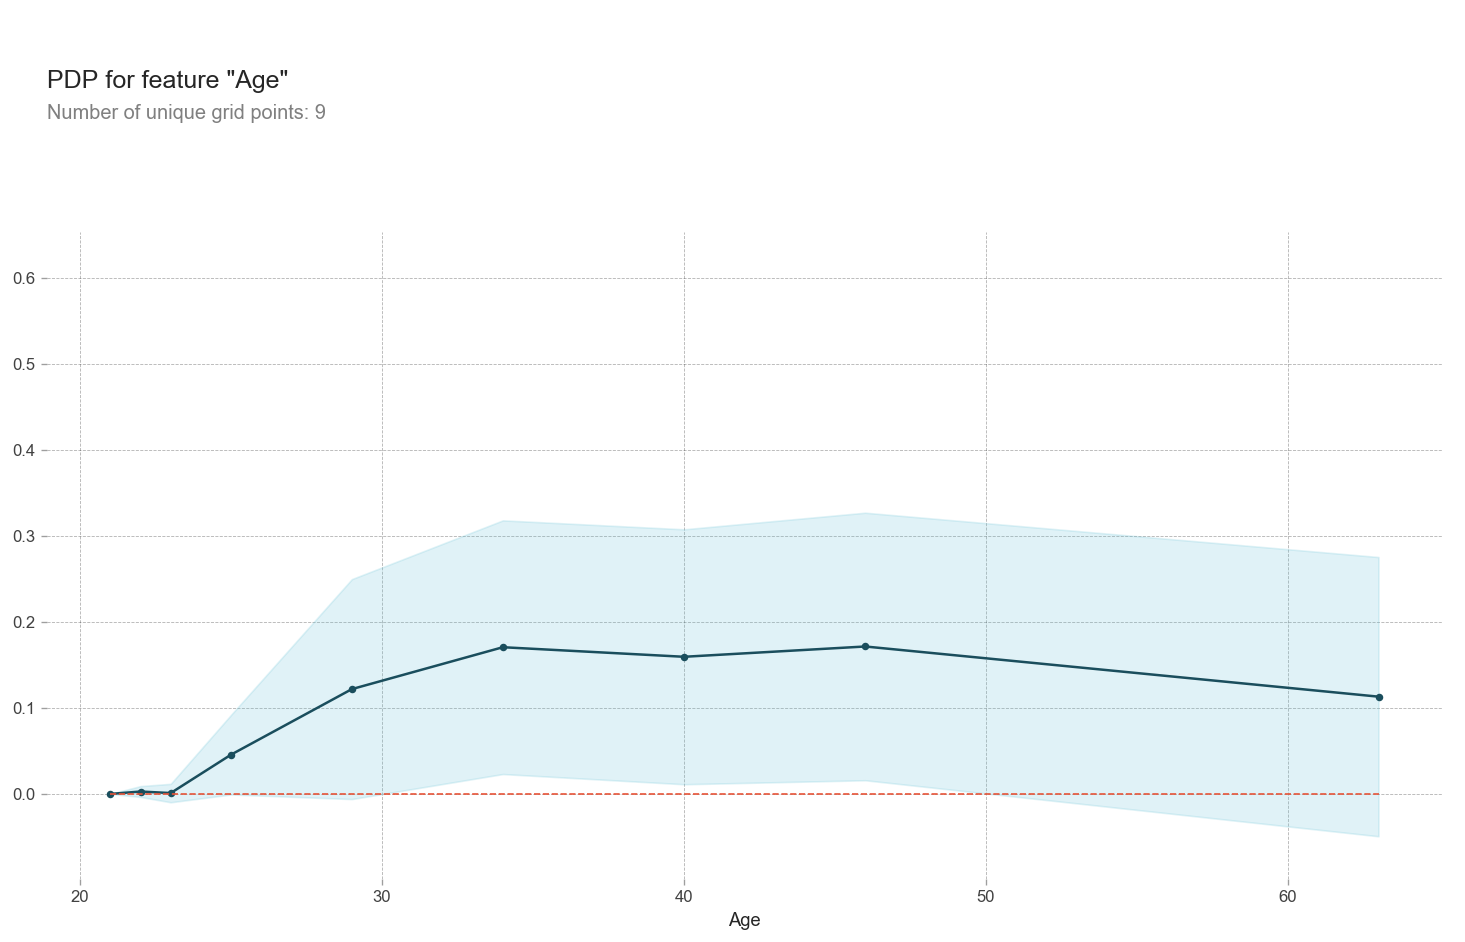

In [395]:
pdp_p = pdp.pdp_isolate(model=Final_model, dataset=X_test, model_features=X_test.columns.values, 
                        feature='Age')
pdp.pdp_plot(pdp_p, 'Age')
plt.show()

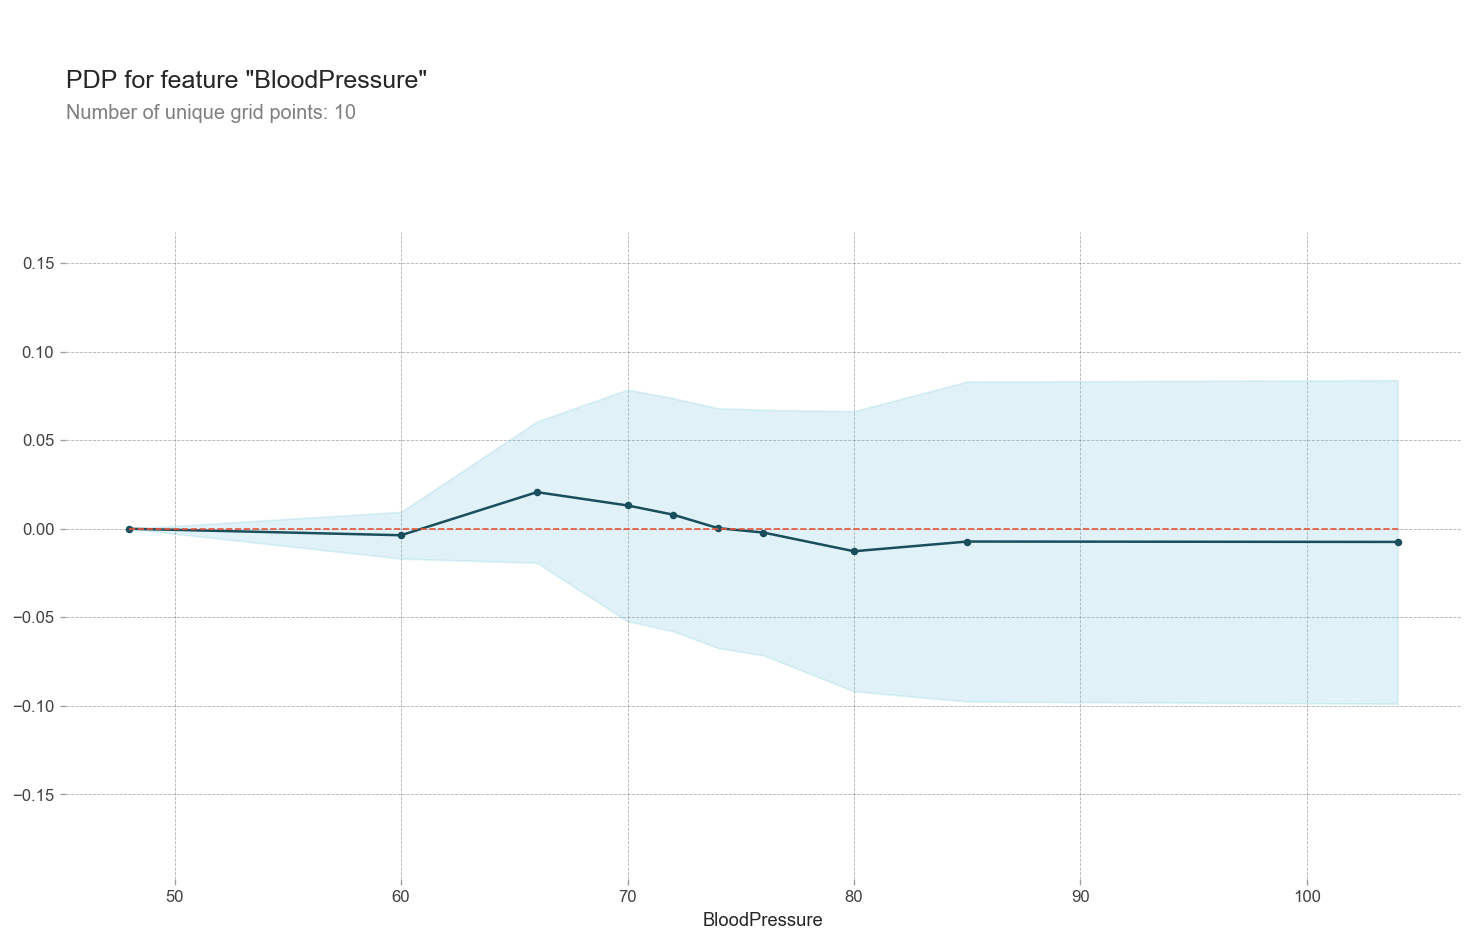

In [396]:
pdp_p = pdp.pdp_isolate(model=Final_model, dataset=X_test, model_features=X_test.columns.values, 
                        feature='BloodPressure')
pdp.pdp_plot(pdp_p, 'BloodPressure')
plt.show()

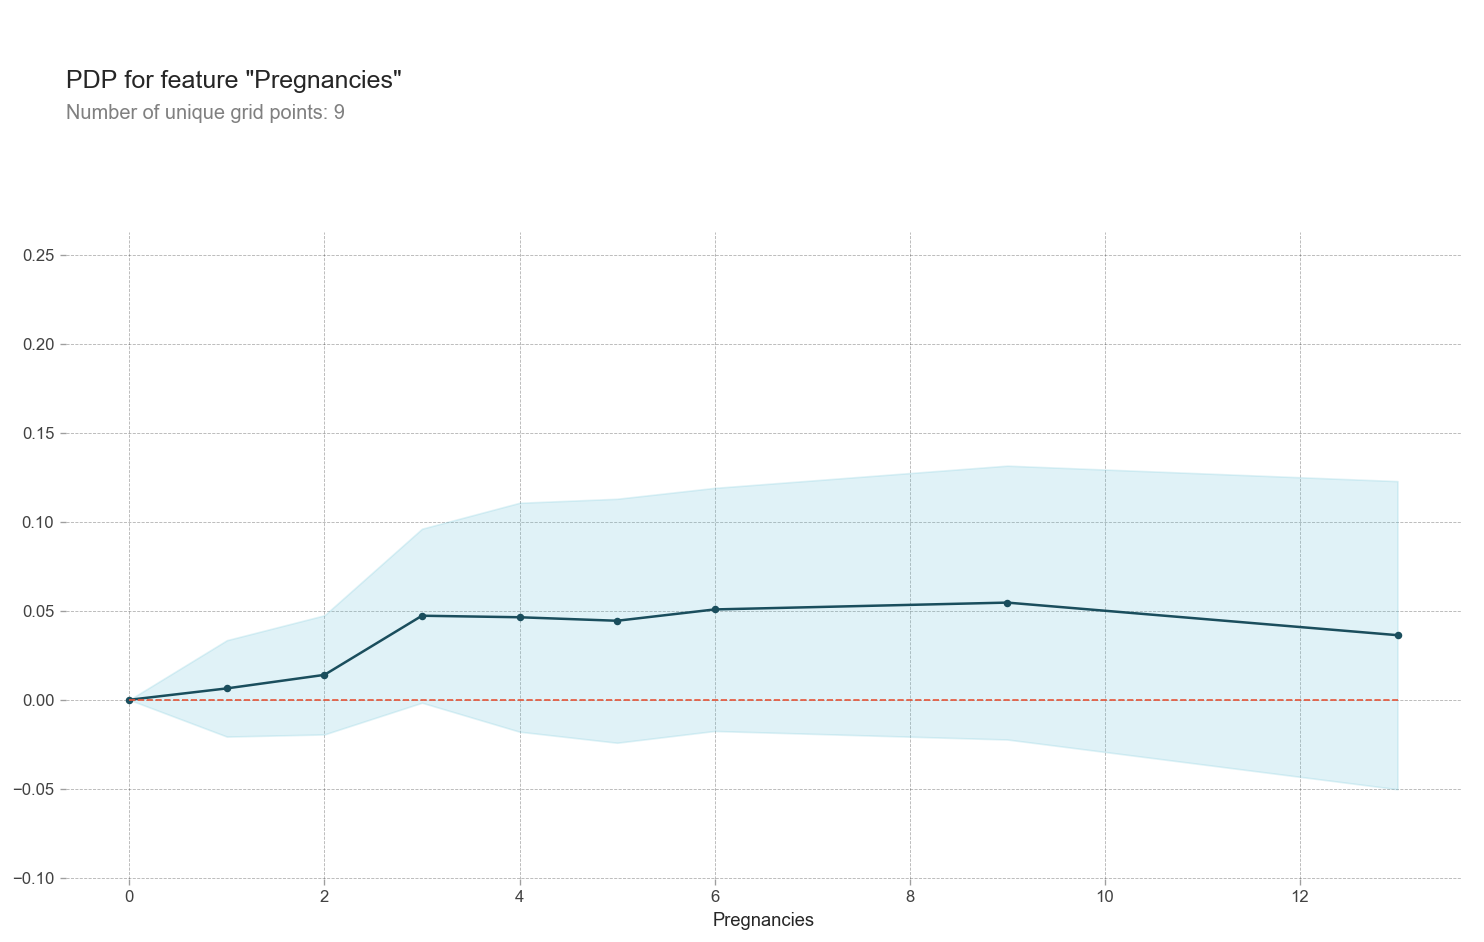

In [397]:
pdp_p = pdp.pdp_isolate(model=Final_model, dataset=X_test, model_features=X_test.columns.values, 
                        feature='Pregnancies')
pdp.pdp_plot(pdp_p, 'Pregnancies')
plt.show()

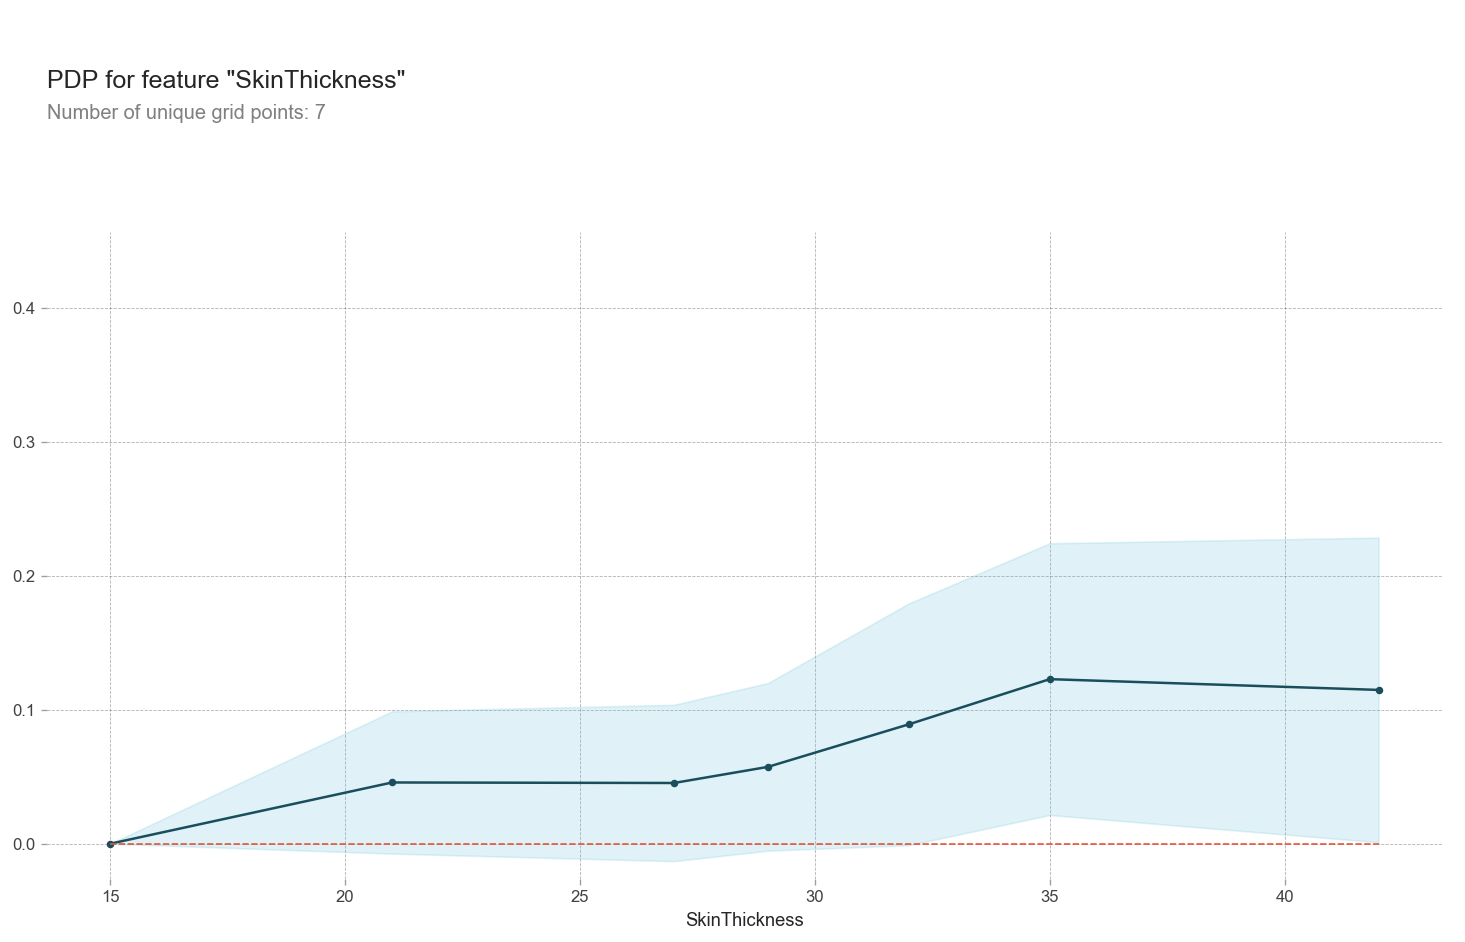

In [398]:
pdp_p = pdp.pdp_isolate(model=Final_model, dataset=X_test, model_features=X_test.columns.values, 
                        feature='SkinThickness')
pdp.pdp_plot(pdp_p, 'SkinThickness')
plt.show()

#### Shap Values

Shap values shows which features increase or decrease the probabilities of having glucose in any patient. This helps take decisions on  individual patients.

In [400]:
import shap 
shap.initjs()

import joblib

In [401]:
explainer = shap.TreeExplainer(Final_model)

shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

In [402]:
ex_filename = 'explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))

['explainer.bz2']

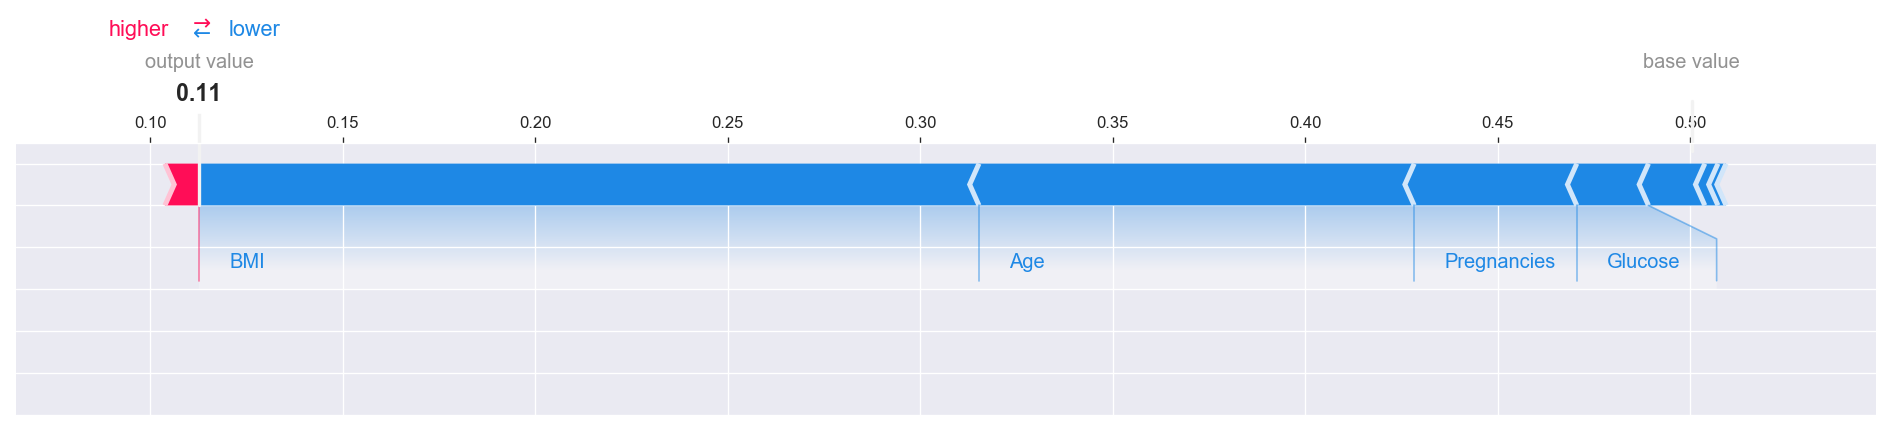

In [403]:
explainer = joblib.load(filename="explainer.bz2")
shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap.force_plot(explainer.expected_value[1], shap_values[1], list(X_test.columns), matplotlib = True, show = False).savefig('shap.png', bbox_inches="tight")